## Dataclass represents graph data structure

In [194]:
import csv, json, sys, math, numpy
from dataclasses import dataclass
from matplotlib import pyplot as plt
from typing import List
from sklearn.cluster._agglomerative import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


@dataclass
class Graph:
    v_count = 0  # number of vertexes
    edge_list = []  # list of edges
    adjac_m = []  # adjacent matrix
    simil_m = []  # similarity matrix
    dist_m = []  # distance matrix

    def read_data(self, file_path: str) -> None:
        self.edge_list = []
        self.adjac_m = []

        try:
            with open(file_path) as f:
                data = csv.reader(f, delimiter=";")
                # O(n)
                v = set()
                for r in data:
                    v.add(r[0])
                    v.add(r[1])
                    if int(r[0]) == int(r[1]):
                        print("Loops are not allowed in the dataset")
                        sys.exit()
                    self.edge_list.append((int(r[0]), int(r[1])))

                self.v_count = len(v)

            # O(n^2)
            for i in range(self.v_count):
                my_list = [0] * self.v_count
                for j in self.edge_list:
                    if j[1] == (i + 1):
                        my_list[j[0] - 1] = 1
                    if j[0] == (i + 1):
                        my_list[j[1] - 1] = 1
                self.adjac_m.append(my_list)

        except (IndexError, ValueError):
            print(
                f"Vertex numbers must be represented by an ascending series "
                f"without skipped numbers"
            )
            sys.exit()

    def __compute_cosine_distance(self) -> None:
        for i, x in enumerate(self.adjac_m):
            simil_row = []
            for j, y in enumerate(x):
                neighs = 0
                di = 0
                dj = 0
                for k, z in enumerate(x):
                    if z == 1:
                        di += 1
                        if self.adjac_m[k][j] == 1:
                            neighs += 1
                for k, z in enumerate(self.adjac_m[j]):
                    dj += 1 if z == 1 else z
                simil_row.append(round(neighs / math.sqrt(di * dj), ndigits=5))
            self.simil_m.append(simil_row)

    def __compute_distance_matrix(self) -> None:
        if self.dist_m == []:
            for i, x in enumerate(self.simil_m):
                dist_m_j = []
                for j, y in enumerate(x):
                    dist_m_j.append(1 - y)
                self.dist_m.append(dist_m_j)

    def __print_matrix(self, matrix: List[List[float]]) -> None:
        plt.rcParams["figure.figsize"] = [18, 9]
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                plt.text(
                    i + 0.5,
                    j + 0.5,
                    round(matrix[i][j], ndigits=3),
                    va="center",
                    ha="center",
                )
        plt.xticks(range(1, len(matrix) + 1))
        plt.yticks(range(1, len(matrix) + 1))
        plt.gca().invert_yaxis()
        plt.tick_params(top=True, labeltop=True)
        plt.box(False)
        plt.grid()
        plt.show()

    def __print_heatmap(self, matrix: List[List[float]]) -> None:
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                plt.text(i, j, round(matrix[i][j], ndigits=3), va="center", ha="center")
        plt.matshow(matrix, cmap=plt.cm.Blues)

    def __compute_linkage_matrix(self, model: AgglomerativeClustering) -> numpy.ndarray:
        chldrn = model.children_
        dst = np.arange(chldrn.shape[0])
        obsv = np.arange(2, chldrn.shape[0]+2)

        return np.column_stack([chldrn, dst, obsv]).astype(float)

    def print_similarity_matrix(self) -> None:
        if self.simil_m == []:
            self.__compute_cosine_distance()

        print(f"\nMATRIX REPRESENTATION OF COSINE SIMILARITY")
        self.__print_matrix(self.simil_m)

    def print_similarity_heatmap(self) -> None:
        if self.simil_m == []:
            self.__compute_cosine_distance()

        print(f"\nHEATMAP REPRESENTATION OF COSINE DISTANCE")
        self.__print_heatmap(self.simil_m)

    def print_distance_matrix(self) -> None:
        if self.simil_m == []:
            self.__compute_cosine_distance()
        if self.dist_m == []:
            self.__compute_distance_matrix()

        print(f"\nMATRIX REPRESENTATION OF COSINE DISTANCE")
        self.__print_matrix(self.dist_m)

    def print_dendrogram(self, clust_numbers: int, linkage: str) -> None:
        cluster = clst.AgglomerativeClustering(
            n_clusters=int(clust_numbers), metric="precomputed", linkage=str(linkage)
        ).fit(g.dist_m)
        linkage_m = self.__compute_linkage_matrix(cluster)

        dendrogram(linkage_m)



## Instantiate graph class

In [195]:
g = Graph()
g.read_data("KarateClub.csv")

## Show similarity and distance matrix with it's heatmap


MATRIX REPRESENTATION OF COSINE SIMILARITY


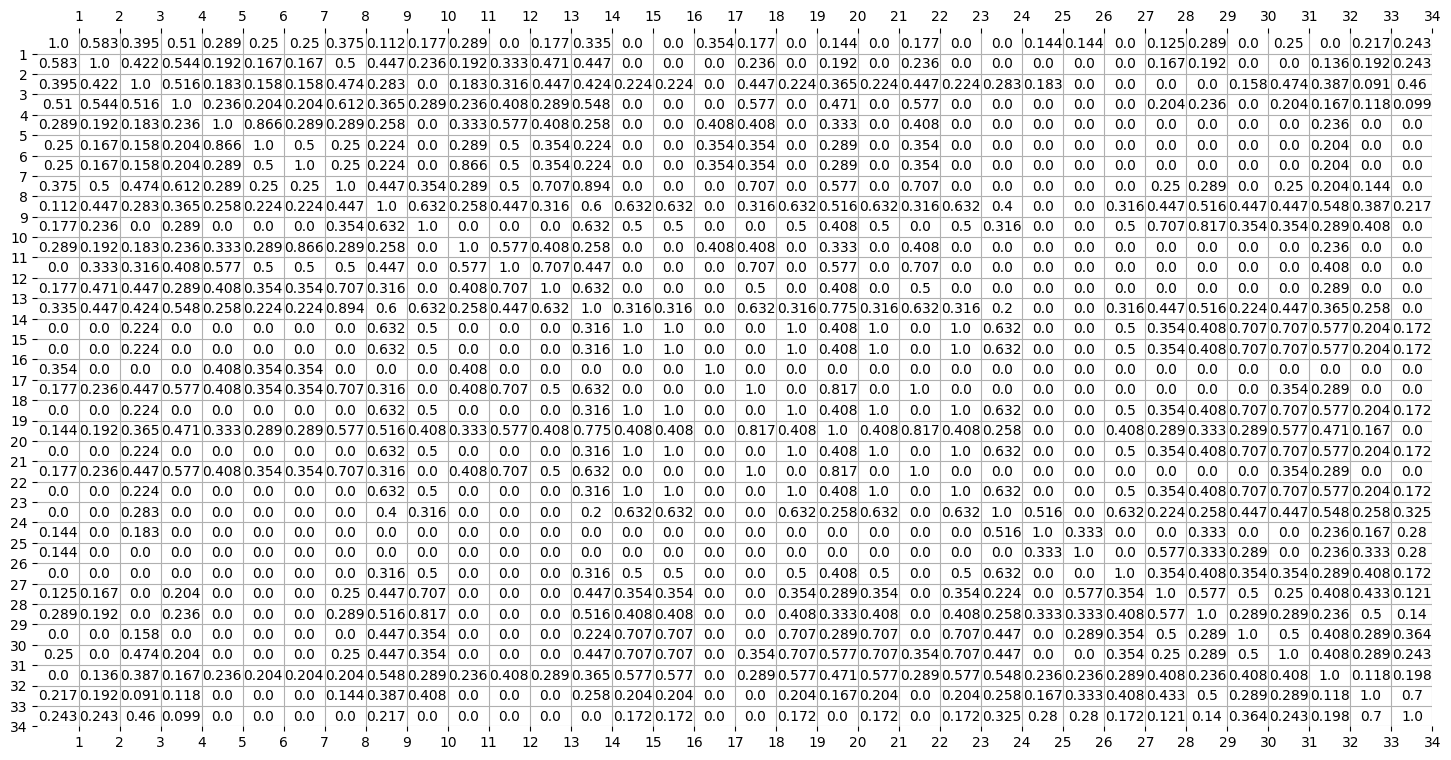


MATRIX REPRESENTATION OF COSINE DISTANCE


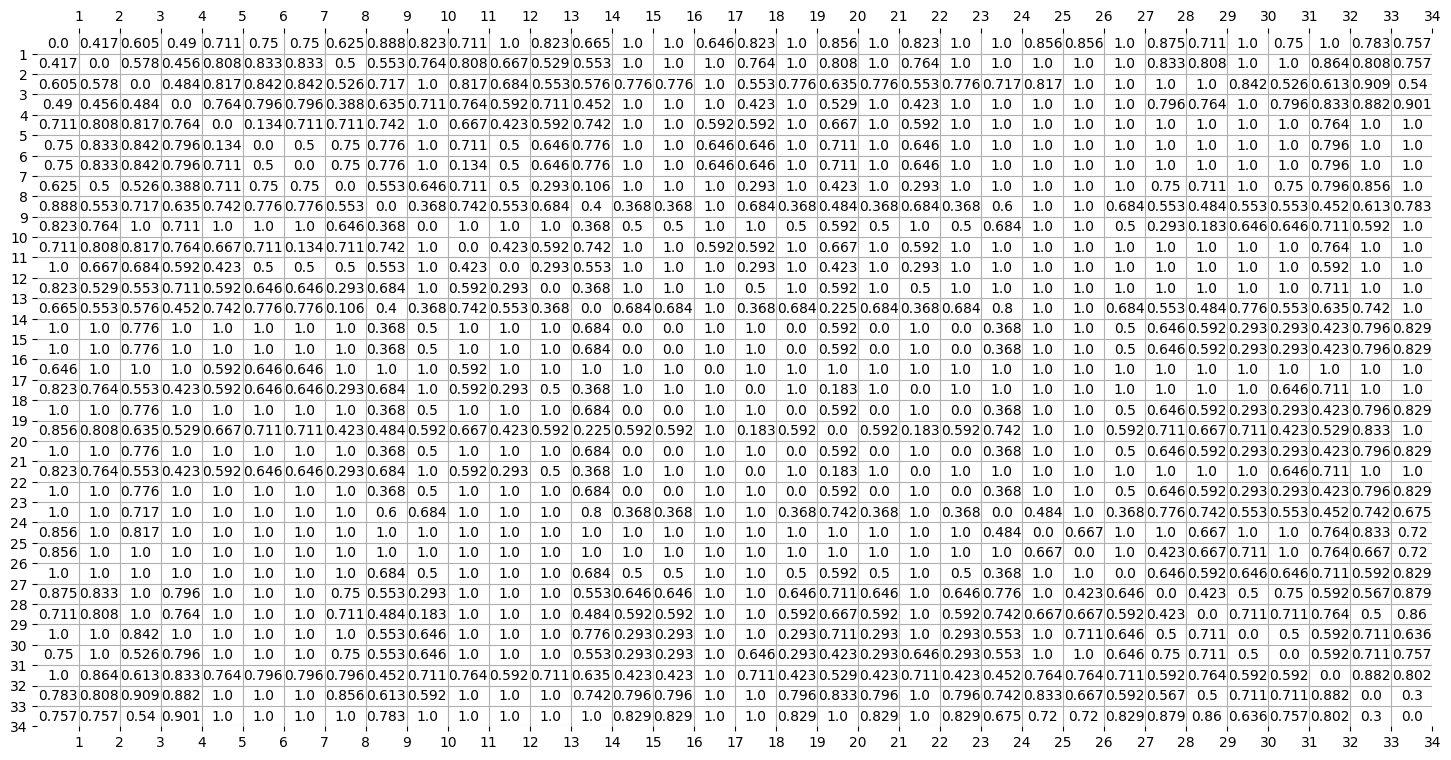


HEATMAP REPRESENTATION OF COSINE DISTANCE


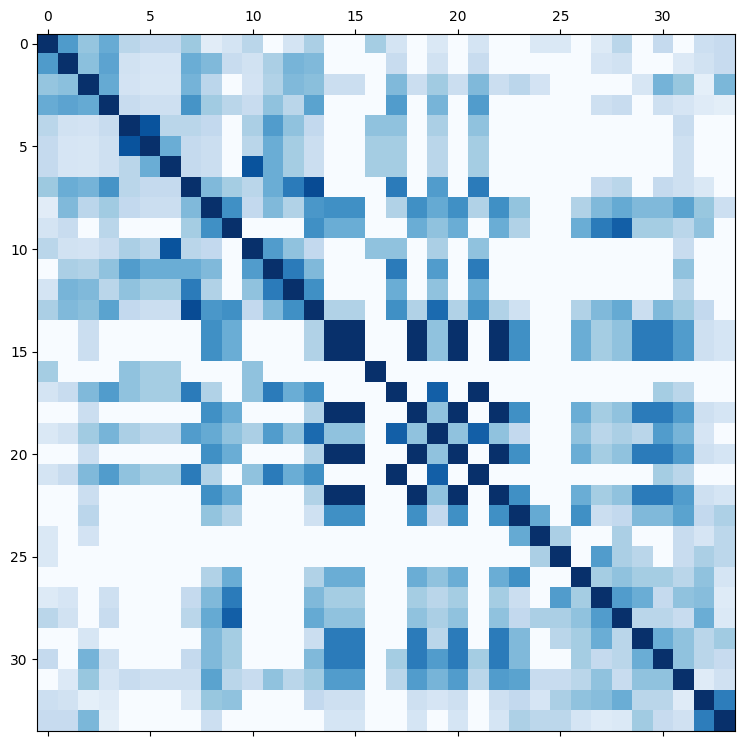

In [196]:
g.print_similarity_matrix()
g.print_distance_matrix()
g.print_similarity_heatmap()

### Show dendrogram of the ward linkage as an example of community detection with
### optimal number of communities

<Figure size 100x100 with 0 Axes>

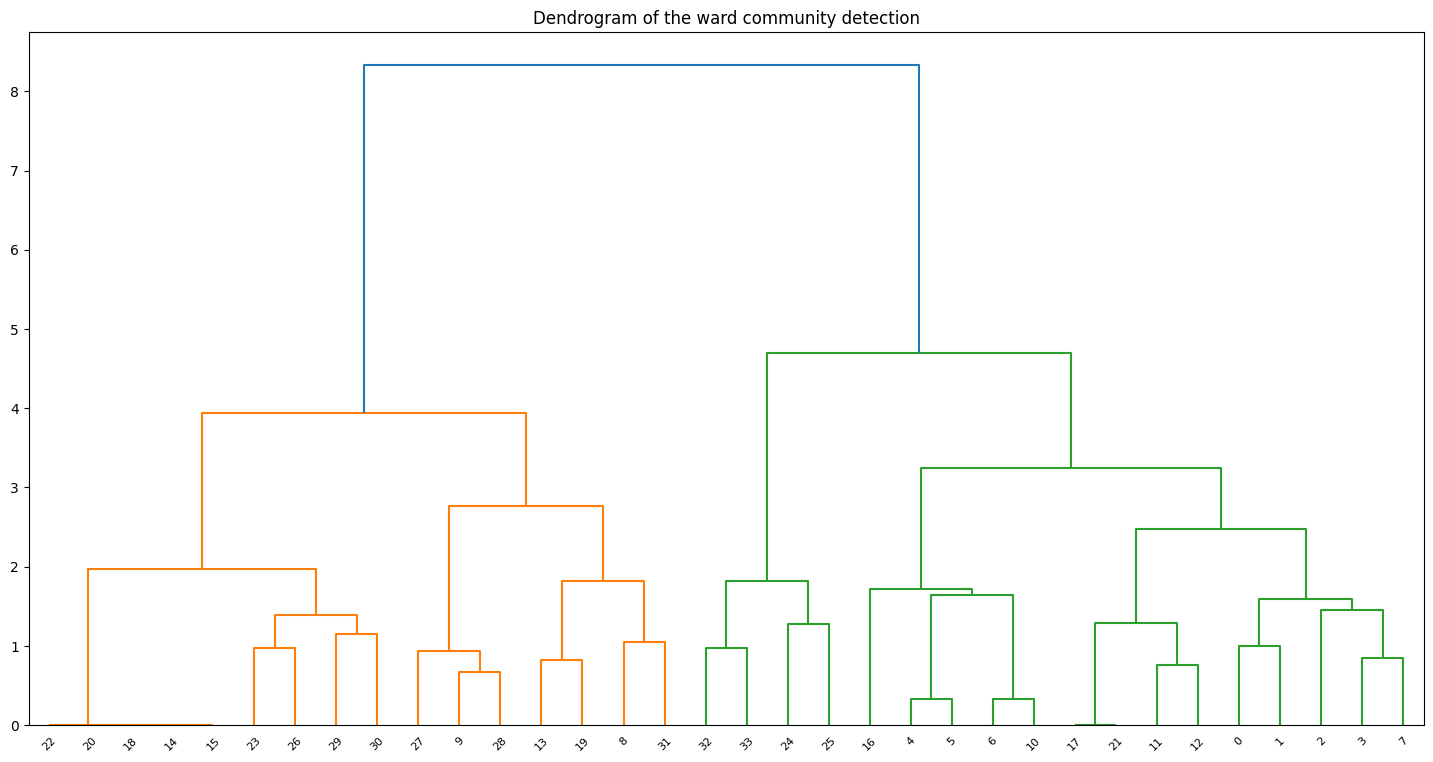

<Figure size 100x100 with 0 Axes>

In [197]:
import scipy.cluster.hierarchy as shc

dend = shc.dendrogram(shc.linkage(g.simil_m, method="ward"))
plt.title("Dendrogram of the ward community detection")
plt.figure(figsize=(1, 1))

### Generate dendrogram with community number and clustering method as input

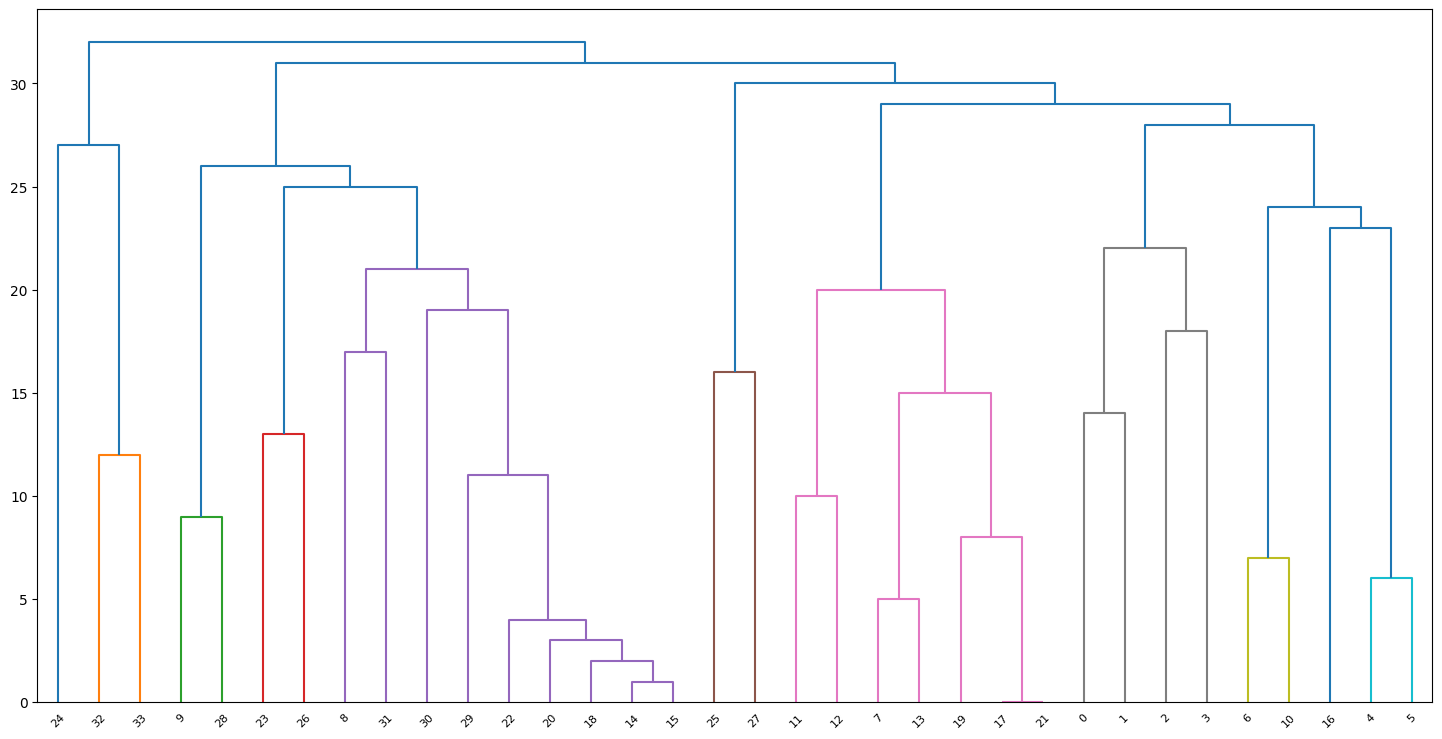

In [198]:
clust_numbers = input("Specify the number of communities for agglomerative clustering")
assert (
    clust_numbers.isnumeric()
), f"the number of communities must be a natural number, you entered `{clust_numbers}`"
linkage = input(
    "Specify a method for hiearchical clustering (average, complete, single)"
)
assert linkage in ["average", "complete", "single"], (
    f"the method for hiearchical clustering must be (average, complete, single), you "
    f"entered "
    f"`{linkage}`"
)

g.print_dendrogram(clust_numbers, linkage)